<a href="https://colab.research.google.com/github/fosky95/AlgoritmoGenetico/blob/main/AlgoritmoGenetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMO GENÉTICO
Emplear el algoritmo genético en python para resolver el siguiente problema:

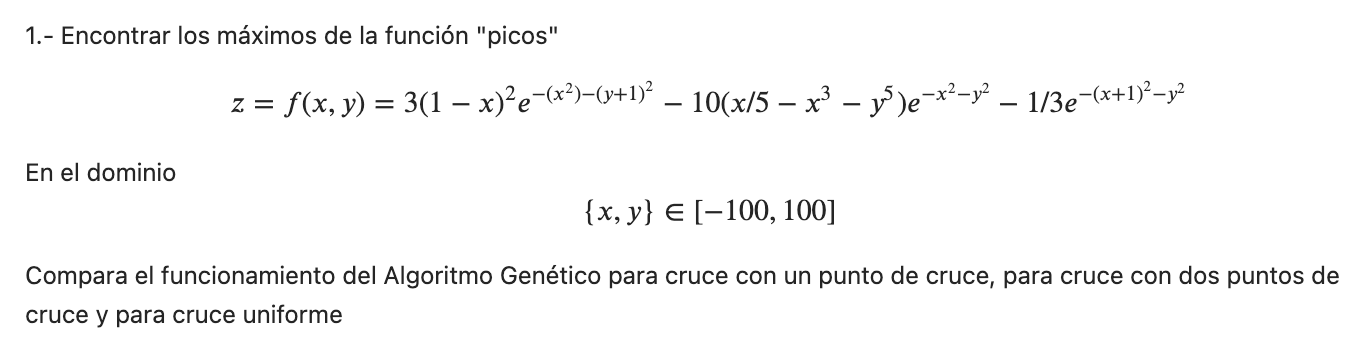

In [44]:
# Descargamos librerías usando pip
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
# Importamos las librerías necesarias

# Librerias para números
import random
import math
import numpy as np

# Librerías para generar la población
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

# Librerias para representar gráficas
import matplotlib.pyplot as plt
from matplotlib import cm

In [46]:
# Escribir la función 
def func(x):
  for i in range(len(x)):
    if x[i] > 100 or x[i] < -100:
      return -1,
  res = 3*((1-x[0])**2)*math.exp(-(x[0]**2)-(x[1]+1)**2) -10*((x[0]/5)-x[0]**3 -x[1]**5)*math.exp(-x[0]**2-x[1]**2) -(1/3)*math.exp(-(x[0]+1)**2-x[1]**2)
  return res,

func([-8.19371235460054, 5.64604925736347]) #Comprobamos que la función funciona

(-1.5477585107053366e-37,)

Para el algoritmo genético, necesitamos emplear números aleatorios (en este caso entre -100 y 100, el dominio). Para esto usamos random:

In [47]:
# Números aleatorios
random.seed(0) #Usaremos los mismos numeros aleatorios para poder hacer pruebas
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]

# Y ahora, generamos los vectores para tener valores de entre -100 y 100
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)

Ahora representamos la función en un modelo 3d.

In [48]:
# Cogemos los valores para representarlos en la función
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape([func(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

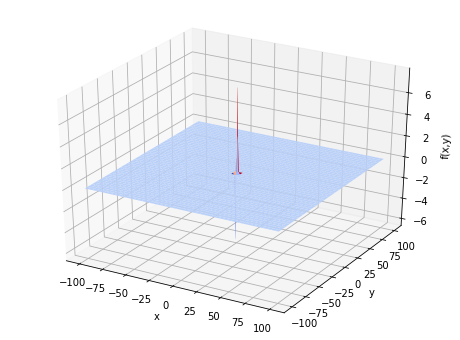

In [49]:
# Y los representamos
figure_3d = plt.figure(figsize=(8,6))
ax = figure_3d.gca(projection="3d")
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

Una vez que esta la función representada, se puede hacer una idea del resultado que se espera. Ahora se puede iniciar el algoritmo genético.

Antes de seguir, se puede apreciar que hay un pico en el (0,0), por lo que el algoritmo genético tenderá a ese resultado.

In [50]:
# Creamos los objetos del problema
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #tipo del problema
creator.create("Individual", list, fitness=creator.FitnessMax) #individuo y sus atributos

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Ahora se define la herramienta *toolbox* para registrar una serie de funciones que se usarán en el algoritmo.

In [51]:
# Toolbox
toolbox = base.Toolbox()

Se registran las funciones que se necesitan

In [52]:
# Genes
toolbox.register("attr_uniform", random.uniform, -100, 100) 
toolbox.attr_uniform() #esta función genera un número aleatorio entre -100 y 100

-37.970486136133474

In [53]:
# Individuo
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2) #individuo

El individuo tiene un atributo que es fitness. Este sirve para evaluar al individuo, pero por ahora esta vacío

In [54]:
# Fitness
#individuo =
#individuo.fitness.values

In [55]:
# Población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 20)
pob = toolbox.population()
pob

[[45.96634965202574, 79.7676575935987],
 [36.79678638308826, -5.571456909457325],
 [-79.85975838632683, -13.165632909243257],
 [22.177394688760316, 82.60221064757965],
 [93.32127355415176, -4.5980446894566],
 [73.061985554328, -47.90153792160812],
 [61.005565402604475, 9.739860767117861],
 [-97.19165996719622, 43.94093728079082],
 [-20.235291555146247, 64.96899542964661],
 [33.63064024637018, -99.77143613711435],
 [-1.284426706935065, 73.52055509855617],
 [-51.2178246225736, -34.95912745052199],
 [74.09424642173093, -61.78658169952189],
 [13.50214812413438, -52.27681427695596],
 [93.50805005802866, 60.63589385597402],
 [-10.406085712885925, -83.91083628949292],
 [-35.98907906549084, 1.5881285041147777],
 [86.56676484538136, -78.18843081377926],
 [10.253449218110248, 41.312281973377935],
 [9.488182265684756, 62.8933726582672]]

Para la función de población, se necesita la función de individuo. Se crea una lista de individuos, 20 en total.

También se necesita la función Hall Of Fame

In [56]:
# HoF
hof = tools.HallOfFame(1)
print(hof)

[]


Una vez está el Hall of Fame, se necesita un objeto para generar las estadísticas que se han visto en clase

In [57]:
# Estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

Y también hay que poner que atributos tiene la clase estadística

In [58]:
# Atributos de estadística
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

Ahora que estan las funciones, introducimos el registro de la evolución del algoritmo. Además, metemos la función evaluar.

In [59]:
# Evaluar la función
toolbox.register("evaluate", func)

Ahora se puede poner un ejemplo de un individuo.

In [60]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[8.056721394064795, 92.76770919476019]

In [61]:
#func(individuo)

In [62]:
#toolbox.evaluate(individuo)

In [63]:
# Cruce
toolbox.register("mate", tools.cxOnePoint)

In [64]:
# Mutación
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [65]:
# Selección
toolbox.register("select", tools.selTournament, tournsize=3)

In [66]:
# Registro de la evolución
logbook = tools.Logbook()
pob, logbook = algorithms.eaSimple(pob, toolbox, cxpb=0,
                                       mutpb=0, ngen=0, stats=stats,
                                       halloffame=hof, verbose=True)
print(logbook)

gen	nevals	avg	std	min	max
0  	20    	0  	0  	0  	0  
gen	nevals	avg	std	min	max
0  	20    	0  	0  	0  	0  


Una vez se han visto las funciones necesarias, se meten en un bucle para poder tener varias generaciones.

## Cruce con un punto de Cruce

In [67]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [68]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 10 veces, que son el número de generaciones
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg        	std         	min          	max        
0  	20    	3.2841e-125	1.43151e-124	-4.39982e-279	6.5682e-124
1  	13    	6.64938e-118	2.8984e-117 	0            	1.32988e-116
2  	15    	1.99481e-117	4.74861e-117	0            	1.32988e-116
3  	15    	5.98444e-117	6.61605e-117	2.44241e-172 	1.32988e-116
4  	4     	1.13039e-116	4.74861e-117	3.53709e-143 	1.32988e-116
5  	7     	1.20946e-84 	5.27192e-84 	1.32988e-116 	2.41892e-83 
6  	12    	3.62839e-84 	8.63729e-84 	1.32988e-116 	2.41892e-83 
7  	14    	6.04932e-84 	1.04731e-83 	6.75185e-157 	2.41892e-83 
8  	15    	7.05188e-17 	3.07384e-16 	2.21162e-119 	1.41038e-15 
9  	7     	2.82076e-16 	5.6415e-16  	1.54242e-89  	1.41038e-15 
10 	9     	7.05189e-16 	7.05187e-16 	2.41892e-83  	1.41038e-15 
11 	8     	1.19882e-15 	5.03605e-16 	2.41892e-83  	1.41038e-15 
12 	11    	1.41038e-15 	0           	1.41038e-15  	1.41038e-15 
13 	14    	1.33986e-15 	3.07384e-16 	5.12016e-41  	1.41038e-15 
14 	11    	1.41038e-15 	0           	1.41038

Y una vez habiendo realizado el algoritmo, se ven los resultados obtenidos.

In [69]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-100, 100])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg          	std	min          	max
0  	20    	-3.46829e-285	0  	-6.93659e-284	0  
1  	12    	0            	0  	0            	0  
2  	15    	0            	0  	0            	0  
3  	11    	-3.68186e-286	0  	-7.36372e-285	0  
4  	8     	0            	0  	0            	0  
5  	17    	0            	0  	0            	0  
6  	8     	0            	0  	0            	0  
7  	12    	0            	0  	0            	0  
8  	12    	0            	0  	0            	0  
9  	10    	0            	0  	0            	0  
10 	10    	0            	0  	0            	0  
11 	10    	0            	0  	0            	0  
12 	15    	0            	0  	0            	0  
13 	13    	0            	0  	0            	0  
14 	14    	0            	0  	0            	0  
15 	14    	0            	0  	0            	0  
16 	17    	0            	0  	0            	0  
17 	9     	0            	0  	0            	0  
18 	12    	0            	0  	0            	0  
19 	8     	0            	0  	0            	0  
20 	13    	0 

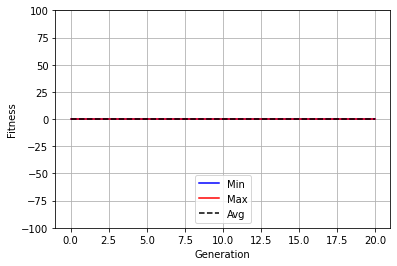

In [70]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

A diferencia del ejercicio que se vio en clase, aquí el resultado que se obtiene es distinto. En este caso, si las variables se alejan del punto (0,0), tienden a 0 (a valores muy pequeños). Para este ejercicio, el óptimo es el mismo punto (0,0), pero para el algoritmo genético es complicado porque este punto representa un porcentaje insignificante dentro de todas las respuestas (que todas tienden a 0). Y, por esa razón, en el algoritmo se obtiene 0 como resultado. Puede ser que cambiando la semilla, se obtengan otros números aleatorios que permitan encontrar el pico en el (0,0), que si se pone en la función, se obtiene:


In [71]:
func([0,0])

(0.9810118431238463,)

Este valor sea el pico. Esto es lo que se ha obtenido con el cruce de un punto de cruce. A ver cómo actúa con distintos cruces:

## Cruce con dos puntos de cruce

In [72]:
# Cruce
toolbox.register("mate", tools.cxTwoPoint)

In [73]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [74]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 10 veces, que son el número de generaciones
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg        	std         	min          	max        
0  	20    	3.2841e-125	1.43151e-124	-4.39982e-279	6.5682e-124
1  	11    	0.0151244  	0.0659257   	0            	0.302488   
2  	15    	0.0453732  	0.10801     	0            	0.302488   
3  	14    	0.120995   	0.148188    	3.58021e-149 	0.302488   
4  	14    	0.275723   	0.497589    	1.32988e-116 	2.35348    
5  	11    	0.374788   	0.462872    	1.32988e-116 	2.35348    
6  	17    	0.405037   	0.447003    	0.302488     	2.35348    
7  	15    	0.485103   	0.626868    	0.000114721  	2.35348    
8  	10    	1.02033    	0.978259    	0.302488     	2.35348    
9  	13    	1.91236    	0.884941    	-0.0134022   	2.35348    
10 	12    	2.35348    	4.44089e-16 	2.35348      	2.35348    
11 	15    	2.35348    	4.44089e-16 	2.35348      	2.35348    
12 	15    	2.35348    	4.44089e-16 	2.35348      	2.35348    
13 	13    	2.23161    	0.53121     	-0.0838809   	2.35348    
14 	11    	2.2358     	0.512928    	2.52607e-30  	2.35348    
15 	13  

Y se obtienen los resultados.

In [75]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-100, 100])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg          	std	min          	max
0  	20    	-3.46829e-285	0  	-6.93659e-284	0  
1  	12    	0            	0  	0            	0  
2  	15    	-0.05        	0.217945	-1           	0  
3  	16    	0            	0       	0            	0  
4  	9     	0            	0       	0            	0  
5  	6     	0            	0       	0            	0  
6  	14    	0            	0       	0            	0  
7  	14    	0            	0       	0            	0  
8  	10    	0            	0       	0            	0  
9  	12    	0            	0       	0            	0  
10 	11    	0            	0       	0            	0  
11 	14    	0            	0       	0            	0  
12 	15    	0            	0       	0            	0  
13 	14    	0            	0       	0            	0  
14 	14    	0            	0       	0            	0  
15 	12    	0            	0       	0            	0  
16 	13    	0            	0       	0            	0  
17 	11    	0            	0       	0            	0  
18 	15    	0            	0 

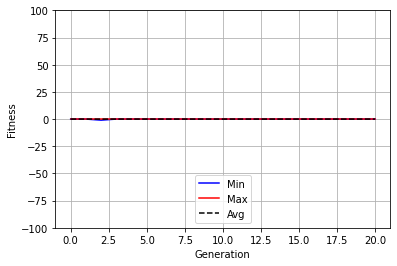

In [76]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Parece que para este ejercicio no hay diferencia cruzando con un punto de cruce que con dos puntos de cruce, al menos en el resultado final. A ver que ocurre con el cruce uniforme.

## Cruce uniforme

In [77]:
# Cruce
toolbox.register("mate", tools.cxUniform, indpb=1)

In [78]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [79]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 10 veces, que son el número de generaciones
for i in range(20):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg        	std         	min          	max        
0  	20    	3.2841e-125	1.43151e-124	-4.39982e-279	6.5682e-124
1  	8     	6.5682e-125	1.97046e-124	0            	6.5682e-124
2  	9     	1.31364e-124	2.62728e-124	0            	6.5682e-124
3  	13    	4.22079e-101	1.8398e-100 	3.53709e-143 	8.44159e-100
4  	8     	2.53248e-100	3.86842e-100	6.5682e-124  	8.44159e-100
5  	14    	1.20539e-97 	5.22708e-97 	6.5682e-124  	2.39897e-96 
6  	11    	6.67498e-97 	1.04088e-96 	8.44159e-100 	2.39897e-96 
7  	13    	1.33411e-96 	1.13054e-96 	2.94645e-194 	2.39897e-96 
8  	14    	1.58765e-92 	6.91946e-92 	8.44159e-100 	3.17489e-91 
9  	11    	4.76251e-92 	1.13365e-91 	1.94869e-200 	3.17489e-91 
10 	9     	1.42871e-91 	1.57947e-91 	2.39897e-96  	3.17489e-91 
11 	14    	2.38117e-91 	1.37476e-91 	2.39897e-96  	3.17489e-91 
12 	10    	1.20546e-89 	5.1234e-89  	2.39897e-96  	2.35378e-88 
13 	12    	5.90826e-89 	1.01784e-88 	3.17489e-91  	2.35378e-88 
14 	9     	1.17848e-88 	1.1753e-88  	3.17489e-9

Y la gráfica:

In [80]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-100, 100])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg          	std	min          	max
0  	20    	-3.46829e-285	0  	-6.93659e-284	0  
1  	14    	0            	0  	0            	0  
2  	14    	0            	0  	0            	0  
3  	10    	0            	0  	0            	0  
4  	13    	0            	0  	0            	0  
5  	13    	0            	0  	0            	0  
6  	14    	0            	0  	0            	0  
7  	13    	0            	0  	0            	0  
8  	11    	0            	0  	0            	0  
9  	13    	0            	0  	0            	0  
10 	15    	0            	0  	0            	0  
11 	14    	0            	0  	0            	0  
12 	12    	0            	0  	0            	0  
13 	14    	0            	0  	0            	0  
14 	15    	0            	0  	0            	0  
15 	12    	0            	0  	0            	0  
16 	13    	0            	0  	0            	0  
17 	15    	4.98933e-238 	0  	0            	9.97867e-237
18 	14    	9.97867e-238 	0  	0            	9.97867e-237
19 	15    	2.49467e-237 	0  	0            


Mejor fitness: 0.000000
Mejor individuo [21.818980427619206, 8.98829612064334]


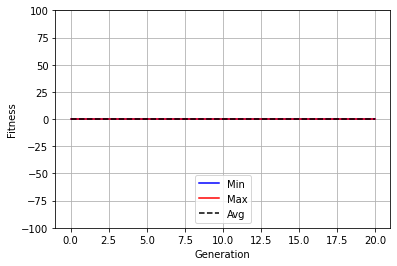

In [81]:
# Generación de población
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Para el cruce uniforme, hay que poner la probabilidad de cruce que hay. Para comprobar resultados (porque se ha comprobado con valores bajos) ponemos que siempre hay cruce (se sabe que es imposible, pero solo es para obtener resultados teóricos).

En este caso, se obtiene un resultado prácticamente igual a los dos anteriores por lo que se explica en el caso 1, pero se puede observar que alrededor de la 5º generación el programa trata de generalizar para obtener otros resultados (que al final acaba otra vez en 0, pero se ve como baja un poco el mínimo).

Como no se aprecia mucho cambio, lo que se puede hacer es tratar de aumentar la población y el número de generaciones. 

In [82]:
# Población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 100)

In [87]:
# Función de poblacion, individuo...
def main():
    CXPB, MUTPB, NGEN = 0.5, 0.2, 200
    pop = toolbox.population()
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)
    return hof, logbook

In [91]:
# Se introducen los mejores valores en una lista
lista_mejores = list()
# Iteramos 10 veces, que son el número de generaciones
for i in range(10):
    # Fijamos la semilla
    random.seed(i)
    best, log = main()
    lista_mejores.append(best[0].fitness.values)

# Mostramos los resultados. Luego, calculamos la media
media = np.mean(lista_mejores)
mejor_total = max(lista_mejores)
print("media: %f" %media)
print("mejor: %f" %mejor_total)

gen	nevals	avg         	std         	min	max        
0  	8     	8.21025e-125	2.17223e-124	0  	6.5682e-124
1  	5     	1.64205e-124	2.84411e-124	0  	6.5682e-124
2  	4     	4.10513e-124	3.17982e-124	0  	6.5682e-124
3  	4     	6.5682e-124 	0           	6.5682e-124	6.5682e-124
4  	5     	6.5682e-124 	0           	6.5682e-124	6.5682e-124
5  	6     	6.5682e-124 	0           	6.5682e-124	6.5682e-124
6  	8     	6.5682e-124 	0           	6.5682e-124	6.5682e-124
7  	6     	6.5682e-124 	0           	6.5682e-124	6.5682e-124
8  	2     	6.5682e-124 	0           	6.5682e-124	6.5682e-124
9  	8     	1.15577e-95 	3.05789e-95 	6.5682e-124	9.24619e-95
10 	3     	2.31155e-95 	4.00372e-95 	6.5682e-124	9.24619e-95
11 	8     	5.77887e-95 	4.47629e-95 	6.5682e-124	9.24619e-95
12 	6     	9.24619e-95 	0           	9.24619e-95	9.24619e-95
13 	4     	1.74974e-77 	4.62936e-77 	9.24619e-95	1.39979e-76
14 	1     	3.49947e-77 	6.06126e-77 	9.24619e-95	1.39979e-76
15 	4     	3.49947e-77 	6.06126e-77 	9.24619e-95	1.39979

In [92]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    # ax1.fill_between(gen, fit_mins, fit_maxs, where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-100, 100])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg	std	min	max
0  	8     	0  	0  	0  	0  
1  	2     	0  	0  	0  	0  
2  	7     	0  	0  	0  	0  
3  	4     	0  	0  	0  	0  
4  	6     	0  	0  	0  	0  
5  	7     	-0.125	0.330719	-1 	0  
6  	7     	0     	0       	0  	0  
7  	4     	0     	0       	0  	0  
8  	5     	0     	0       	0  	0  
9  	5     	0     	0       	0  	0  
10 	4     	0     	0       	0  	0  
11 	4     	0     	0       	0  	0  
12 	6     	0     	0       	0  	0  
13 	8     	0     	0       	0  	0  
14 	6     	0     	0       	0  	0  
15 	4     	0     	0       	0  	0  
16 	4     	0     	0       	0  	0  
17 	4     	0     	0       	0  	0  
18 	7     	0     	0       	0  	0  
19 	3     	0     	0       	0  	0  
20 	4     	0     	0       	0  	0  
21 	3     	0     	0       	0  	0  
22 	6     	0     	0       	0  	0  
23 	4     	0     	0       	0  	0  
24 	4     	0     	0       	0  	0  
25 	2     	0     	0       	0  	0  
26 	6     	0     	0       	0  	0  
27 	6     	0     	0       	0  	0  
28 	2     	0     	0       	0  	0 

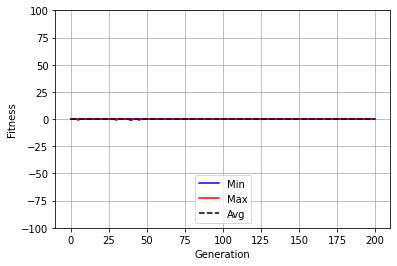

In [93]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 8)
random.seed(42)
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])
plot_evolucion(log)

Parece ser que no se obtiene el resultado esperado al pico, pero si se puede observar que hay varios mínimos tratando de buscar el punto obtimo. Puede ser que para esta ecuación concreta no se obtenga la solución esperada y se necesite otro tipo de algoritmo.

---

